In [1]:
#import useful libraries 
import pandas as pd
import json
import sys
import requests
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
%matplotlib inline 

from data_loader import *
%load_ext autoreload
%autoreload 2


##link to the datasets
##https://www.cs.cmu.edu/~ark/personas/
##https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv
##https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
##https://www.kaggle.com/datasets/unanimad/the-oscar-award/data

In [2]:
df_character = load_character().copy()
df_movie = load_movie().copy()
df_name_cluster = load_name_cluster().copy()
df_summary = load_plot_summary().copy()
df_tropes_cluster = load_tropes_cluster().copy()

In [3]:
df_movie.shape

(81741, 12)

In [4]:
# Replace 'id-translation.wikidata.json' with the path to your JSON file
file_path = 'id-translation.wikidata.json'

# Load the JSON file into a DataFrame
df_id_translation = pd.read_json(file_path, orient='records', lines=True)

# Display the loaded DataFrame
display(df_id_translation)

,tconst,Freebase ID
0,nm0010930,/m/0282x
1,nm0124133,/m/09b6zr
2,nm0684496,/m/014d3
3,nm0061667,/m/01rgr
4,tt1675434,/m/0hgqwpj
...,...,...
990440,tt20913312,None
990441,tt29623578,None
990442,nm1456284,None
990443,tt27348595,None


In [5]:
df_id_translation = df_id_translation.dropna(subset=['Freebase ID'])
#df_id_translation.drop_duplicates(subset=['Freebase ID'], keep='first', inplace=True)
print(df_id_translation.shape)

(397518, 2)


In [6]:
df_id_translation.drop_duplicates(subset=['Freebase ID'], keep='first', inplace=True)
print(df_id_translation.shape)

(396337, 2)


In [7]:
df_movie = pd.merge(df_movie, df_id_translation, on='Freebase ID', how='left')
display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726


In [8]:
df_kaggle_movie = load_movie_kaggle()

#merge the datasets on the 'Name', 'Year' and 'tconst' columns
df_movie = df_movie.merge(df_kaggle_movie[['Name', 'Year', 'tconst', 'Month', 'Day']], on=['Name', 'Year','tconst'], how='left', suffixes=('', '_df2'))

#use 'combine_first' to fill in the 'Box office' values from df_kaggle_movie where they are NaN in df_movie
df_movie['Month'] = df_movie['Month'].combine_first(df_movie['Month_df2'])
df_movie['Day'] = df_movie['Day'].combine_first(df_movie['Day_df2'])

#drop the extra 'Box office' column from df_kaggle_movie
df_movie.drop('Month_df2', axis=1, inplace=True)
df_movie.drop('Day_df2', axis=1, inplace=True)

df_movie = df_movie.drop_duplicates(subset='Wikipedia ID', keep='first')

display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81752,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585
81753,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259
81754,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411
81755,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726


# PCA anaysis 

Here is a first draft of the principal component analysis of our data.

In [31]:
#converting the year, month and day values into a datetime format and the week number of the release date
df_movie_PCA = new_date_format(df_movie)

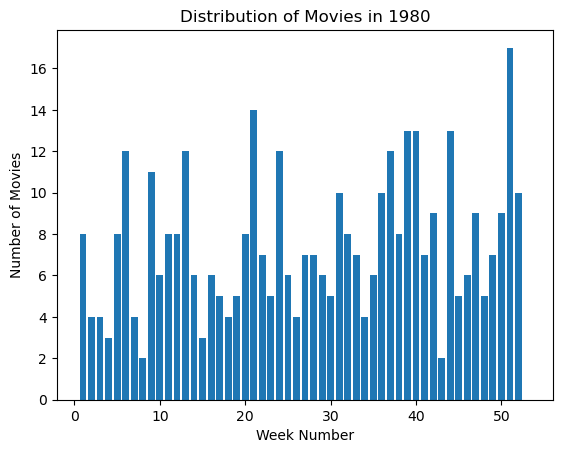

In [10]:
#count the number of movies coming out each week number each year 
movie_count_df = df_movie_PCA.groupby(['Year', 'Week_Number']).size().reset_index(name='Movie_Count')
#pivot the dataframe to create an array
movie_array = movie_count_df.pivot(index='Year', columns='Week_Number', values='Movie_Count').fillna(0).astype(int)
#select a subset of year to get more consistent results
movie_array = movie_array[(movie_array.index >= 1980) & (movie_array.index <= 2011)]
#change to observe other year
selected_year = 1980
#extract the row for the selected year
selected_year_row = movie_array.loc[selected_year]

#plot a histogram
plt.bar(selected_year_row.index, selected_year_row)
plt.xlabel('Week Number')
plt.ylabel('Number of Movies')
plt.title(f'Distribution of Movies in {selected_year}')
plt.show()

We look here at the number of movies coming out each week in 1980

<Axes: >

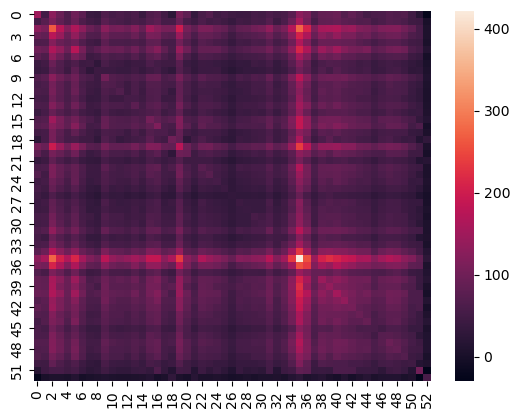

In [52]:
#computing the covariance matrix our our movies numbers across years
movie_array_val = movie_array.values
cov_matrix = np.cov(movie_array_val.T)
sns.heatmap(cov_matrix)

The covariance matrix shows us the weeks of important common variance in movie releases

In [12]:
#computing the singular value decomposition
U, S, VT = np.linalg.svd(cov_matrix)
#choosing the number of components
nb_comp = 2
#taking the eigenvectors and eigenvalues
U_top = U[:, :nb_comp]
S_top = np.diag(S[:nb_comp])
VT_top = VT[:nb_comp, :]
#projecting our data on new coordinates
projected_data = np.dot(movie_array, U_top)
main_variations = np.dot(projected_data, U_top.T)

The Singular Value Decomposition is a standard decomposition techniques which gives us the eigenvectors and eigenvalues of our covariance matrix. These will be our principal components, ordered by variance explained. Then by projecting our original data on a certain number of components we get to see the points of common variance across years.

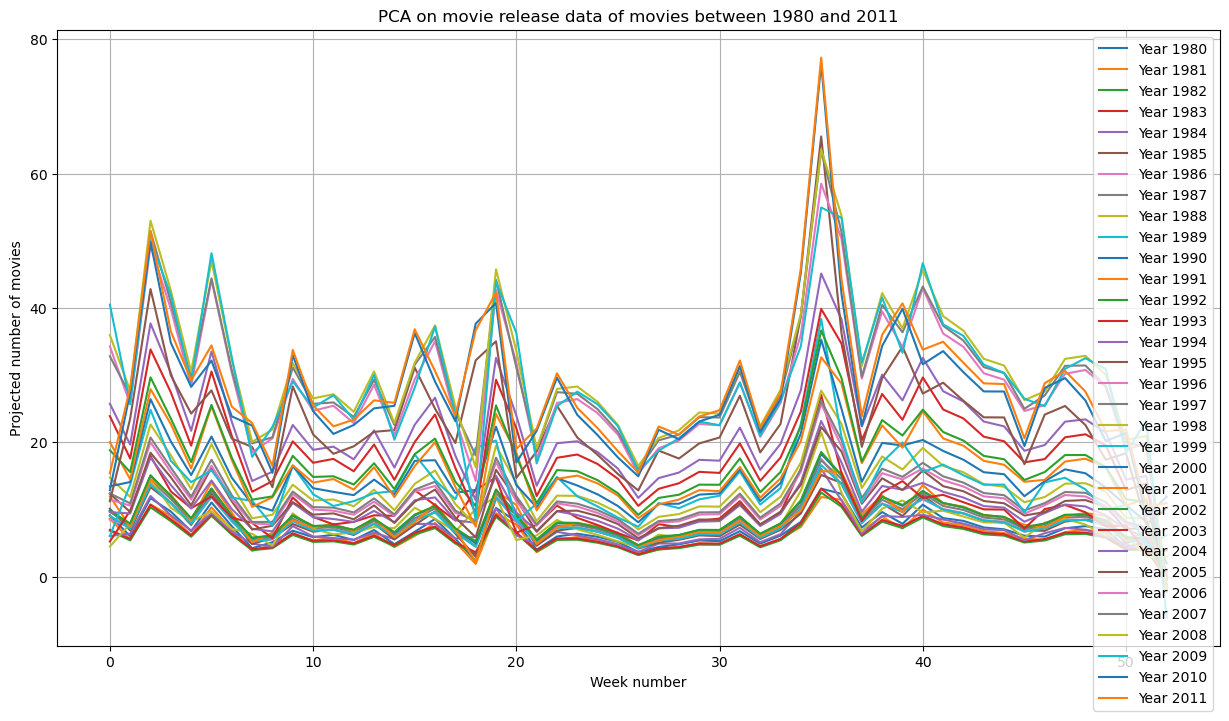

In [29]:
#plotting the PCA of our data projected onto two principal components
fig, ax = plt.subplots(figsize=(15, 8))
for i in range(32):
    ax.plot(main_variations[i], label=f'Year {i + 1980}')

ax.set_xlabel('Week number')
ax.set_ylabel('Projected number of movies')
ax.set_title('PCA on movie release data of movies between 1980 and 2011')
ax.legend()
ax.grid(which='both')
plt.show()

With further analysis, by looking at specific countries, genres and periods we'll be able to observe shared trends in movie releases that we could've missed otherwise.

# Oscars analysis

In [46]:
#load oscar reward dataset
df_oscar = load_oscar_winner()
display(df_oscar)

,Year,year_ceremony,ceremony,category,name,Name,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10755,2022,2023,95,WRITING (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,True
10756,2022,2023,95,WRITING (Original Screenplay),Written by Steven Spielberg & Tony Kushner,The Fabelmans,False
10757,2022,2023,95,WRITING (Original Screenplay),Written by Todd Field,Tár,False
10758,2022,2023,95,WRITING (Original Screenplay),Written by Ruben Östlund,Triangle of Sadness,False


In [47]:
#load file with ceremony dates
df_date_ceremony = pd.read_csv('oscars_ceremony_dates.csv')
#filter the dataframe to only include rows where 'winner' is True
df_winner_movie = df_oscar[df_oscar['winner'] == True]
#merge the datasets on ceremony number
df_winner_movie = pd.merge(df_winner_movie, df_date_ceremony, on='ceremony', how='left')

In [48]:
#group by the movie name and count the winners time
df_winner_movie = df_winner_movie.groupby('Name').agg(
    num_oscars_won=pd.NamedAgg(column='winner', aggfunc='size'),
    date_won=pd.NamedAgg(column='date', aggfunc=lambda x: list(x))
).reset_index()
#sort the movies by oscars won
df_oscar_wins = df_winner_movie.sort_values(by='num_oscars_won', ascending=False)

In [49]:
#merge CMU and oscars awards dataset
df_movie_oscars = pd.merge(df_movie, df_oscar_wins, left_on='Name', right_on='Name', how='left')
#replace NaN values in 'num_oscars_won' with 0 for movies that didn't win any Oscars
df_movie_oscars['num_oscars_won'].fillna(0, inplace=True)
#extracting only the movies who won at least 1 oscar
only_winners = df_movie_oscars[(df_movie_oscars['num_oscars_won'] > 0)]
#using our function to get additionnal information
only_winners = new_date_format(only_winners)

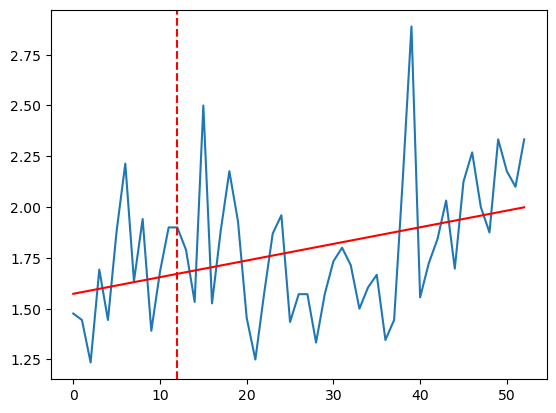

In [51]:
#looking at average number of oscars won by movies which came out each week
average_oscar_per_week = only_winners.groupby('Week_Number')['num_oscars_won'].mean()
average_oscar_per_week_array = average_oscar_per_week.values
weeks = np.arange(0,53)
#computing a linear regression to highlight particular trends
coefficients = np.polyfit(weeks, average_oscar_per_week_array, 1)
linear_fit = np.poly1d(coefficients)

plt.plot(average_oscar_per_week_array)
plt.axvline(x=12, color='red', linestyle='--', label='Oscar season begins')
plt.plot(weeks, linear_fit(weeks), color='red', label='Linear Regression')

Here we are looking at the average number of oscars won by movies released each week, the red dotted line represents the approximate start of the oscar season. To draw out any conclusions we'll need further analysis but we can hypothethise that this is due to movies having a better chance of winning the oscar the later in the year they come out.